# Library / Packages

In [1]:
# basic library
import os
import pandas as pd
import numpy as np
import sys

# graph
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# complex math
from scipy import stats

# pickle and .env
from dotenv import dotenv_values
import pickle

# Format

In [2]:
def lab_round(x, pos): 
    if abs(x) >= 1e9: 
        return f'{x/1e9} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3} K'
    
    else:
        return f'{x}'
    
def val_round(x):
    if abs(x) >= 1e9:
        return f'{x/1e9:.2f} B'
    
    elif abs(x) >= 1e6:
        return f'{x/1e6:.2f} M'
    
    elif abs(x) >= 1e3:
        return f'{x/1e3:.2f} K'
    
    else:
        return f'{x:.2f}'

# Data Source

In [3]:
# parameter
share = {**dotenv_values('../.env.shared')} 

# read pickle
with open(share['PREPARATION_DATA'], 'rb') as f:
    loaded_data = pickle.load(f)

cc_df = pd.DataFrame(loaded_data)
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   credit_card                294588 non-null  int64         
 1   datetime                   294588 non-null  datetime64[ns]
 2   long                       294588 non-null  float64       
 3   lat                        294588 non-null  float64       
 4   zipcode                    294588 non-null  int64         
 5   state                      294588 non-null  object        
 6   city                       294588 non-null  object        
 7   date                       294588 non-null  datetime64[ns]
 8   year                       294588 non-null  int32         
 9   quarter                    294588 non-null  object        
 10  month                      294588 non-null  int32         
 11  first_day_month            294588 non-null  datetime

In [4]:
cc_df.head()

,credit_card,datetime,long,lat,zipcode,state,city,date,year,quarter,month,first_day_month,season,week_cat,day,time,credit_card_limit,transaction_dollar_amount
0,1003715054175576,2015-09-11 00:32:40,-80.174132,40.267370,15342,pa,houston,2015-09-11,2015,2015Q3,9,2015-09-01,dry,weekday,friday,00:32:40,20000,43.78
1,1003715054175576,2015-10-24 22:23:08,-80.194240,40.180114,15342,pa,houston,2015-10-24,2015,2015Q4,10,2015-10-01,rainy,weekend,saturday,22:23:08,20000,103.15
2,1003715054175576,2015-10-26 18:19:36,-80.211033,40.313004,15342,pa,houston,2015-10-26,2015,2015Q4,10,2015-10-01,rainy,weekday,monday,18:19:36,20000,48.55
3,1003715054175576,2015-10-22 19:41:10,-80.174138,40.290895,15342,pa,houston,2015-10-22,2015,2015Q4,10,2015-10-01,rainy,weekday,thursday,19:41:10,20000,136.18
4,1003715054175576,2015-10-26 20:08:22,-80.238720,40.166719,15342,pa,houston,2015-10-26,2015,2015Q4,10,2015-10-01,rainy,weekday,monday,20:08:22,20000,71.82


# Data Visualization

## Basic Analyst

### Descriptive Analyst

In [5]:
# filter data for descriptive analyst
#===============================
descriptive_data = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month']
descriptive_data = descriptive_data.drop(columns = exclude_col, errors = 'ignore')

# Deskripsi statistik
#===============================
description = descriptive_data.describe(include = 'all').map(val_round)

mode = descriptive_data.mode().iloc[0].map(val_round)
variance = descriptive_data.var().map(val_round)
range_ = (descriptive_data.max() - descriptive_data.min()).map(val_round)
iqr = stats.iqr(descriptive_data)
coefficient_of_variation = (descriptive_data.std() / descriptive_data.mean()).map(val_round)
skewness = descriptive_data.skew().map(val_round)
kurtosis = descriptive_data.kurtosis().map(val_round)

# add data into description descriptive
#=======================================
description.loc['mode'] = mode
description.loc['variance'] = variance
description.loc['range'] = range_
description.loc['IQR'] = val_round(iqr)
description.loc['Coefficient of Variation'] = coefficient_of_variation
description.loc['Skewness'] = skewness
description.loc['Kurtosis'] = kurtosis

description

,credit_card_limit,transaction_dollar_amount
count,294.59 K,294.59 K
mean,15.50 K,86.01
std,7.96 K,124.66
min,2.00 K,0.01
25%,10.00 K,29.97
50%,15.00 K,58.47
75%,20.00 K,100.40
max,55.00 K,999.97
mode,20.00 K,24.15
variance,63.30 M,15.54 K


### Data Distribution

In [6]:
rows = cc_df.shape[0]
cols = cc_df.shape[1]

if rows <= 5000 or cols <= 20:
    category = "Small Dataset"

elif rows <= 50000 or cols <= 100:
    category = "Medium Dataset"

elif rows <= 1000000 or cols <= 500:
    category = "Large Dataset"

elif rows <= 10000000 or cols <= 1000:
    category = "Very Large Dataset"

else:
    category = "Massive Dataset"

print(f'Rows: {val_round(rows)}, Columns: {val_round(cols)}, then Dataset Category: {category.upper()}!!!')

Rows: 294.59 K, Columns: 18.00, then Dataset Category: SMALL DATASET!!!


#### Numeric Category

##### Menguji Normalitas Data

In [7]:
# Anderson methode
from scipy.stats import anderson

# Pilih kolom numerik
numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom
for col in numeric_columns:
    # Lakukan uji Anderson-Darling
    result = anderson(cc_df[col], dist='norm')
    
    statistic_result = result.statistic
    critical_values = result.critical_values
    significance_levels = result.significance_level  # Tingkat signifikansi

    # Ambil nilai kritis pada tingkat signifikansi 5%
    critical_value_5_percent = critical_values[2]  # Indeks ke-2 untuk 5%
    print(f"Column: {col} \n")
    print(f"Statistic: {statistic_result}")
    print(f"Critical Value (5%): {critical_value_5_percent} \n")
    
    # Bandingkan nilai statistik dengan nilai kritis
    if statistic_result < critical_value_5_percent:
        print(f"Column {col}: Data berdistribusi normal\n")

    else:
        print(f"Column {col}: Data tidak berdistribusi normal\n")

Column: credit_card_limit 

Statistic: 4928.5428442920675
Critical Value (5%): 0.787 

Column credit_card_limit: Data tidak berdistribusi normal

Column: transaction_dollar_amount 

Statistic: 37362.67249053239
Critical Value (5%): 0.787 

Column transaction_dollar_amount: Data tidak berdistribusi normal



In [8]:
# A'Agostino methode
from scipy.stats import normaltest

# Pilih kolom numerik
numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom
for col in numeric_columns:
    stat, p = normaltest(cc_df[col])
    print(f"Column: {col}, \nStatistics = {stat:.4f}, p = {p:.4f}")

    if p > 0.05:
        print(f"Column {col}: Data berdistribusi normal\n")
    
    else:
        print(f"Column {col}: Data tidak berdistribusi normal\n")

Column: credit_card_limit, 
Statistics = 44483.4911, p = 0.0000
Column credit_card_limit: Data tidak berdistribusi normal

Column: transaction_dollar_amount, 
Statistics = 300585.0700, p = 0.0000
Column transaction_dollar_amount: Data tidak berdistribusi normal



##### Menguji Homogenitas Varians

In [9]:
from scipy.stats import levene

# Pilih kolom numerik
numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom numerik
for col in numeric_columns:
    group1 = cc_df[cc_df['season'] == 'dry'][col]
    group2 = cc_df[cc_df['season'] == 'rainy'][col]

    stat, p = levene(group1, group2)
    print(f"Column: {col}, \nStatistics = {stat:.2f}, p = {p:.2f}")
    
    if p > 0.05:
        print(f"Column {col}: Varians antar kelompok homogen\n")
        
    else:
        print(f"Column {col}: Varians antar kelompok tidak homogen\n")


Column: credit_card_limit, 
Statistics = 3.11, p = 0.08
Column credit_card_limit: Varians antar kelompok homogen

Column: transaction_dollar_amount, 
Statistics = 0.03, p = 0.87
Column transaction_dollar_amount: Varians antar kelompok homogen



##### Menguji Perbandingan Rata-rata

In [13]:
from scipy.stats import mannwhitneyu

# Pilih kolom numerik
numeric_columns = ['credit_card_limit', 'transaction_dollar_amount']

# Iterasi untuk setiap kolom numerik
for col in numeric_columns:
    # Membagi data berdasarkan kategori 'season' (dry dan rainy)
    group1 = cc_df[cc_df['season'] == 'dry'][col]
    group2 = cc_df[cc_df['season'] == 'rainy'][col]

    # Lakukan Mann-Whitney U Test
    stat, p = mannwhitneyu(group1, group2, alternative = 'two-sided')
    
    # Tampilkan hasil
    print(f"Column: {col}, \nStatistics = {stat:.2f}, p = {p:.2f}")
    
    if p > 0.05:
        print(f"Column {col}: Tidak ada perbedaan signifikan\n")
    else:
        print(f"Column {col}: Ada perbedaan signifikan\n")


Column: credit_card_limit, 
Statistics = 7333333456.00, p = 0.48
Column credit_card_limit: Tidak ada perbedaan signifikan

Column: transaction_dollar_amount, 
Statistics = 7331999080.50, p = 0.53
Column transaction_dollar_amount: Tidak ada perbedaan signifikan



### Histogram

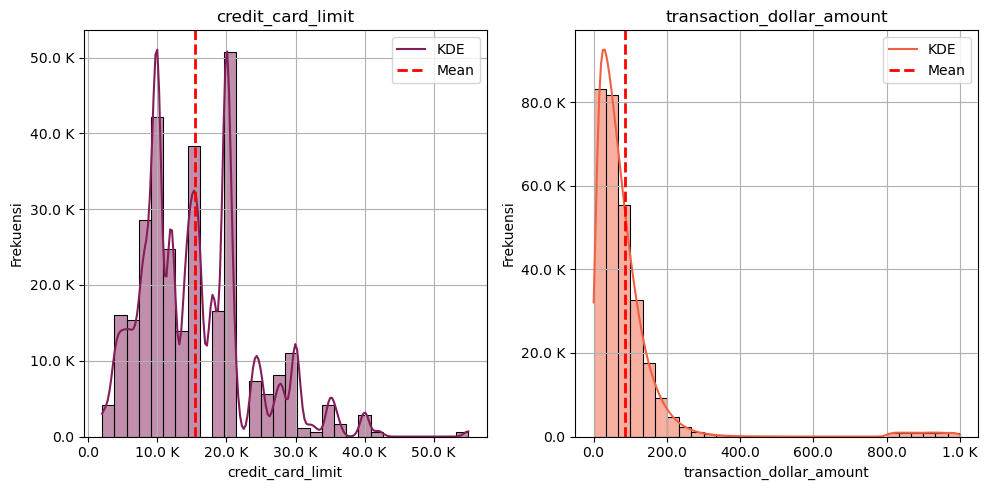

In [14]:
# Data
hist_data = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month']
hist_data = hist_data.drop(columns = exclude_col, errors = 'ignore')

# Set up subplot grid
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(hist_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Plot each histogram
for i, column in enumerate(hist_data.columns):
    sns.histplot(hist_data[column], bins = 30, kde = True, color = colors[i], edgecolor = 'black', ax = ax[i])
    ax[i].set_title(column)
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Frekuensi')

    # Adding vertical line for mean
    ax[i].axvline(x=hist_data[column].mean(), color = 'red', linestyle = '--', linewidth = 2)

    # Add legend
    ax[i].legend(['KDE', 'Mean'], loc = 'upper right')

     # Applying format_number function to the ylabel
    ax[i].xaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

### Data Transformation

In [ ]:
cc_df['log_transaction_dollar_ammount'] = np.log(cc_df['transaction_dollar_ammount'] + 1)

### Outlier Check

#### Z-Score Methode
A normal distribution is shown below and it is estimated that 68% of the data points lie between +/- 1 standard deviation. 95% of the data points lie between +/- 2 standard deviation 99.7% of the data points lie between +/- 3 standard deviation

In [ ]:
cc_df.info()

In [ ]:
# Data
sample_columns = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month']
sample_columns = sample_columns.drop(columns = exclude_col, errors = 'ignore').columns 

sample_data = cc_df[sample_columns]

# Set a threshold
threshold = 2

# Loop untuk memeriksa setiap kolom satu persatu
for col in sample_columns:
    # Data kolom
    col_data = sample_data[col]

    # Calculate Z-Score untuk kolom ini
    z_scores = (col_data - col_data.mean()) / col_data.std()

    # Filter out outliers
    outliers = col_data[np.abs(z_scores) >= threshold]
    non_outliers = col_data[np.abs(z_scores) < threshold]

    # Menampilkan hasil secara terstruktur untuk setiap kolom
    print(f"--- {col} ---")
    print('=' * 40)
    print(f"Z-Score Summary:")
    print(f"\tMean: {z_scores.mean()}")
    print(f"\tStandard Deviation: {z_scores.std()} \n")
    print(f"Outliers Threshold: {threshold}")
    
    # Menampilkan jumlah outliers dan non-outliers
    print(f"Outliers: {len(outliers)}")
    print(f"Non-Outliers: {len(non_outliers)} \n")
    
    # Tampilkan beberapa outliers dan non-outliers
    print("Sample of Outliers:")
    print(f"{outliers.head()} \n")  # Tampilkan beberapa outliers

    print("Sample of Non-Outliers:")
    print(f"{non_outliers.head()} \n")  # Tampilkan beberapa non-outliers
    print('=' * 40)
    print("\n")  # Spasi antar kolom

# Hasil akhir
print(f"Completed processing for all columns.")

#### IQR Methode

In [ ]:
# Data
box_data = cc_df.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month']
box_data = box_data.drop(columns = exclude_col, errors = 'ignore')

# Set up subplot grid
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(box_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Create boxplots for each column
for i, col in enumerate(box_data.columns):
    sns.boxplot(y = col, data = box_data, ax = ax[i], color = colors[i])
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].set_title(col)
    ax[i].grid(axis = 'both')

#
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# DataFrame columns to check for outliers
columns_to_check = ['credit_card_limit', 'transaction_dollar_amount']

# Function to calculate IQR and filter outliers
def filter_outliers(df, columns):
    while True:
        outlier_indices = set()
        
        for col in columns:
            Q1 = np.percentile(df[col], 25, method = 'midpoint')
            Q3 = np.percentile(df[col], 75, method = 'midpoint')
            IQR = Q3 - Q1
            
            upper_bound = Q3 + 1.5 * IQR
            lower_bound = Q1 - 1.5 * IQR
            
            col_outliers = df[(df[col] >= upper_bound) | (df[col] <= lower_bound)].index
            outlier_indices.update(col_outliers)
        
        # If no outliers are found, break the loop
        if not outlier_indices:
            break
        
        # Remove outliers
        df.drop(index=outlier_indices, inplace=True)
    
    return df

# Apply the function
cc_df_cleaned = filter_outliers(cc_df.copy(), columns_to_check)

# Display the old and new shape of the DataFrame
print(f'Old Shape: {cc_df.shape}')
print(f'New Shape: {cc_df_cleaned.shape}')

In [ ]:
# # clean data
# cc_df = cc_df_cleaned.copy()

#### Re-Checking

In [ ]:
# Data
box_data = cc_df_cleaned.select_dtypes(include = ['number'])

exclude_col = ['credit_card', 'long', 'lat', 'zipcode', 'year', 'month']
box_data = box_data.drop(columns = exclude_col, errors = 'ignore')

# Set up subplot grid
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Flatten axes for easy iteration
ax = ax.flatten()

# Get number of columns in hist_data
num_cols = len(box_data.columns)

# Generate colors from a colormap with enough colors for each subplot
colors = sns.color_palette("rocket", num_cols)

# Create boxplots for each column
for i, col in enumerate(box_data.columns):
    sns.boxplot(y = col, data = box_data, ax = ax[i], color = colors[i])
    ax[i].yaxis.set_major_formatter(ticker.FuncFormatter(lab_round))
    ax[i].set_title(col)
    ax[i].grid(axis = 'both')

#
plt.tight_layout()

# Show plot
plt.show()

## Basic Visualization